### Experiments exploration

In [41]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [42]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [43]:
base_case = Policy('Base Case', **{l.name:0 for l in dike_model.levers})

In [44]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=base_case)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [45]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,20.0,176.861574,1.5,0.782335,54.822450,1,0.681229,314.030131,10,0.243310,301.688838,1.5,0.060150,232.094790,10,0.270732,3.5,4.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,Base Case,dikesnet
1,107.0,86.657001,10,0.458530,165.659710,1.5,0.289662,62.346406,10,0.525942,85.290859,1.5,0.374501,142.208264,1,0.382832,2.5,4.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,Base Case,dikesnet
2,83.0,112.308472,10,0.032869,109.701131,10,0.739737,279.768806,10,0.346580,119.511823,10,0.234091,134.658115,1.5,0.379904,2.5,2.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,Base Case,dikesnet
3,5.0,233.897977,1,0.831500,328.601395,1.5,0.982916,130.085453,1,0.191117,182.246184,1,0.902661,252.373164,10,0.735554,2.5,4.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,Base Case,dikesnet
4,5.0,34.374379,1,0.288434,188.771865,1.5,0.143154,144.839686,1,0.583672,95.512016,1,0.042773,208.226712,1.5,0.453320,2.5,1.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,Base Case,dikesnet
5,43.0,64.651425,1.5,0.876613,32.149205,1,0.797563,36.635102,1.5,0.501977,335.096490,10,0.505697,77.382940,1.5,0.672069,3.5,4.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,Base Case,dikesnet
6,110.0,150.276439,10,0.322493,286.419087,1,0.502636,204.415879,1,0.448876,295.182074,10,0.230749,144.831701,1,0.223708,2.5,1.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,Base Case,dikesnet
7,21.0,227.973930,10,0.988974,300.958720,10,0.531207,145.189624,10,0.885633,342.191726,1.5,0.612936,301.601185,10,0.978631,4.5,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,Base Case,dikesnet
8,36.0,320.750473,10,0.408488,34.134804,1,0.055323,108.630465,1,0.017060,198.750475,1.5,0.473922,204.666851,1,0.741624,1.5,2.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,Base Case,dikesnet
9,19.0,290.807702,10,0.255435,341.287044,1.5,0.602577,78.990916,10,0.613188,318.389626,1.5,0.662209,81.406669,1.5,0.939771,4.5,1.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,Base Case,dikesnet


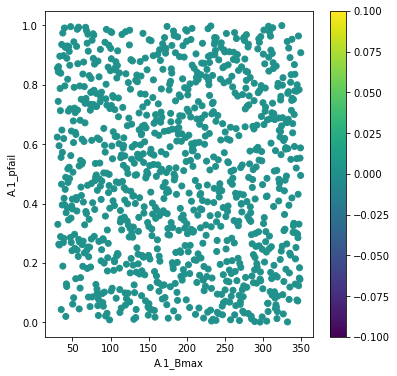

In [46]:
from ema_workbench.analysis import plotting, plotting_util

evac = outcomes['Expected Evacuation Costs 2']
maxEvac = evac

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_Bmax'], experiments['A.1_pfail'], c=maxEvac)
plt.colorbar(sc)
ax.set_xlabel('A.1_Bmax')
ax.set_ylabel('A.1_pfail')
plt.show()

In [47]:
experiments.to_csv('Experiments_from_Exploration_1000scenarios_pf5.csv')

In [23]:
outcomes_DF = pd.DataFrame(outcomes)
outcomes_DF.to_csv('Outcomes_from_Exploration_1000scenarios_pf5.csv')

In [38]:
outcomes_load_DF = pd.read_csv('Outcomes_from_Exploration_1000scenarios_pf5.csv')
#adjust to the ones needed
outcomes_of_interest = outcomes_load_DF.iloc[:,-17::]

In [39]:
pd.set_option('display.max_columns', None)

outcomes_of_interest

,A.1_Expected Annual Damage 2,A.1_Dike Investment Costs 2,A.1_Expected Number of Deaths 2,A.2_Expected Annual Damage 2,A.2_Dike Investment Costs 2,A.2_Expected Number of Deaths 2,A.3_Expected Annual Damage 2,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,4.544545e+07,0,0.031465,2.381660e+07,0,0.021812,7.323077e+08,0,1.196398,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,8.940776e+06,0,0.004863,4.448197e+08,0,0.280451,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,7.967542e+08,0,0.634045,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
3,1.011949e+09,0,0.643508,1.692218e+06,0,0.001489,7.140051e+07,0,0.117474,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
4,2.985963e+08,0,0.245137,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,1.378244e+07,0,0.007346,0.000000e+00,0,0.000000,0.0,0.0
5,0.000000e+00,0,0.000000,1.321915e+07,0,0.009658,1.019877e+08,0,0.136058,0.000000e+00,0,0.000000,1.179956e+08,0,0.078565,0.0,0.0
6,6.655983e+08,0,0.649209,6.352499e+06,0,0.008813,2.774987e+08,0,0.686393,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
7,0.000000e+00,0,0.000000,1.281351e+08,0,0.137714,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
8,0.000000e+00,0,0.000000,6.636454e+06,0,0.009601,2.512268e+06,0,0.006855,5.098531e+06,0,0.003825,0.000000e+00,0,0.000000,0.0,0.0
9,9.967465e+07,0,0.052404,0.000000e+00,0,0.000000,5.175799e+06,0,0.006933,6.376236e+07,0,0.020493,0.000000e+00,0,0.000000,0.0,0.0


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(outcomes_of_interest, vars=list(outcomes_of_interest.keys()))
plt.show()

KeyboardInterrupt: 

In [ ]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_of_interest

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()